<a href="https://colab.research.google.com/github/joshuajhchoi/ai2learn/blob/master/Titanic_%EA%B0%95%EC%9D%98%EC%9A%A9_%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic 입문 (머신러닝 입문)

타이타닉 EDA to Prediction

* 타이타닉 챌린지는 나이, 성별 또는 승객 클래스와 같은 변수를 기반으로 주어진 승객의 생존 또는 사망을 예측하는 경쟁입니다.
* 앞에서 사이킷런을 공부하기 위해 같은 샘플을 해보았습니다.
* 사이킷 런 기반으로 분석을 해보겠습니다.



사이킷런 (sklearn이라고도 부름) 은 무료 소프트웨어로 파이썬 프로그래밍 언어를 위한 머신러닝 라이브러리이다.
Classification, Regression, Clustering, Descision Tree 등의 다양한 알고리즘을 적용할 수 있는 함수들을 제공하며 현재도 수 많은 알고리즘이 추가적으로 제공되고 있습니다.
사이킷런 자체 샘플 데이터도 있고, UC Irvine 에서 제공하는 데이터도 있습니다. 우리는 캐글대회의 기본인 타이타닉으로 작업을 하며 이해를 하겠습니다.

##목차

#### Part1: Exploratory Data Analysis(EDA):
* 내용 분석​
* 여러 기능을 고려한 관계 또는 경향 찾기

#### Part2: Feature Engineering and Data Cleaning:
* 몇 가지 항목 추가
* 중복 항목 제거
* 모델링에 적합한 형상으로 항목 변환

#### Part3: Predictive Modeling
* 기본 알고리즘 실행
* 교차 검증
* 앙상블
* 중요 항목 추출


# Part1: Exploratory Data Analysis(EDA)

## Task 1 - 시작하기

* 자료 다운로드하기
[자료 다운로드](https://www.kaggle.com/c/3136/download-all)

으로 가서 파일을 다운로드 한다. (Kaggle note에서 할 때는 불러 오는 것이 좀 더 단순하나 주피터 노트북에서 할 때는 다운로드 및 임포트를 해야한다.)

* 필요한 것들을 임포트 좀 해야겠죠.

* math, time, random, datetime 등의 모듈을 임포트합니다.


In [0]:
import math, time, random, datetime

* 다음에는 데이터를 처리할 라이브러리를 임포트합니다.

In [0]:
import numpy as np
import pandas as pd

* 그 다음은 비쥬얼라이제이션을 할 것을 import 합니다.

In [0]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

* matplolib의 pyplot은 이미 익숙하실 것이다.
* missingno 패키지는 누락데이터에 대한 시각화를 쉽게 할 수 있다. matrix()명령은 매트리스 형태로 누락데이터를 시각화하는 명령이다. 즉, 몽땅 까맣게 나오면 해당 열의 데이터가 다 있다는 이야기이고, 중간에 흰 것들이 나오면 이는 빈칸이 많다는 것을 보여준다.
* plt.style.use('seaborn-whitegrid')은 matplotlib에서 seaborn whitegrid 모양의 플롯을 쓰겠다는 것이다. 자체적 뿐만 아니라 R에서 널리 사용되는 ggplot 같은 것도 사용할 수 있다.
* 아래 %matplotlib inline의 역할은 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다. 이 라인을 넣지 않으면 그래프 등을 못 보실 수 도 있습니다.

In [0]:
%matplotlib inline

* 자 이제는 프리 프로세싱을 하는 모듈 들을 sklearn에서 불러온다

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

* OneHotEncoder는 범주형 변수를 바이너리화 하는 모듈이다.
* Label Encoder는 문자형 라벨을 정수형으로 바꾸어 주는 모듈이다.
* labelbinarize는 라벨을 바이너리로 바꾸어 주는 모듈이다.

* 이어서 머신러닝하는 알고리즘을 불러온다.
* 하나만 사용하는 것이 아니라 아주 여러 가지를 경험해 본다.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

* sklearn의 model_selection에서 데이터 분할을 위한 train_test_split 함수를 불러온다. 데이터 집합을 train과 test용으로 나누어 train을 사용하여 회귀분석 모형을 만들고 test 데이터로 성능을 계산하는 방법이다. 
* model_slection은 에스티메이터 및 매개 변수 선택, tree는 트리구조 생성, metricspreprocessing은 전처리, metric는 측정, linear_model은 선형모델을 만듭니다.
* LinearSVC는 Linear Support Vector Classification으로 고밀도 및 희소 입력을 모두 지원하며 멀티 클래스 지원은 일대일 구성표에 따라 처리한다.
* Gradient Boosting for classifier는 단계별로 추가적 모델을 만듭니다. 임의의 차별화 가능한 손실 함수를 최적화 할 수 있습니다.
* KNeighborsClassifier는 앙상블에 사용되며 임의의 서브셋의 50% 샘플과 50% 항목을 합하여 평가하는 일을 합니다.
* GaussianNB는 확률을 보정해주는 일을 합니다.
* LinearRegression 선형 회귀분석, LogisticRegression은 논리 회귀 분석, SGDClassifier는 정확성을 높여주는 것에 쓰입니다.
* DecisionTreeClassifier는 멀티플 평가에 쓰입니다. 

* 마지막으로 warning 안 나오게 (Pandas가 경고를 수시로 던지기도 합니다.)

In [0]:
import warnings
warnings.filterwarnings('ignore')

## Task 2 - 파일보기

* 파일을 보겠습니다.

* Kaggle에서는 우측의 Data에 가셔서 input 에서 원하는 파일을 보세요

* 다운로드한 파일을 업로드하여 임포트 합니다.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


* 이어서 이를 데이터프레임에 임포트하여 데이터셋이 판다스 데이터프레임에 임포트 되도록 합니다.

In [0]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
gender_submission = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))

우리가 기계를 훈련시킬 트레인 파일을 한 번 보도록 하겠습니다.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 나중에 최종 시험 볼 대상인 test 파일을 보겠습니다.

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* 마지막으로 우리가 제출할 포맷이 될 gender submission 파일을 보겠습니다.

In [14]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


* 보시다시피 Passenger id 는 단지 누구가 누구이다 라는 것을 밝히는 identifier인 것 같고
* Survived 는 0이면 사망이고 1이면 살아 남은 사람인 것 같습니다.
* 그럼 일단 훈련시킬 train 파일에 집중하도록 하겠습니다.
* 파일의 길이를 보지요

In [15]:
len(train)

891

* 891명에 대한 데이터 입니다.

#### Iniital (Wild) Guess
 
* 항목을 보면 PClass 는 객실의 레벨인 것 같습니다. 1이 제일 좋은 곳이고 3이 제일 낮은 곳인 것 같습니다.
* 이름은 별 의미가 없을 수도 있으나 중간에 Mr. Miss, Mrs 등이 아닌 master, rev, capt 등이 나오는데 이는 의미가 있습니다.
* Sex는 중요합니다. 보나마나 여성과 아이들을 우선적으로 구명 보트에 타게 했을 것이므로 남성이면 사망 확률이 훨씬 높지요
* Age도 중요합니다. 어릴 수록 구명 보트에 탔을 가능성이 크니까요
* SibSp는 배우자나 형제들과 같이 탄 즉, 가족의 숫자를 나타내므로 가족이 있는 사람의 생존 확률은 컸을 것이라 사료 됩니다.
* Parch 는 부모, 아이들이 같이 탄 경우니까, 역시 생존 확률이 좀 더 높을 것이라 생각됩니다.
* Ticket은 어떻게 의미를 두어야 할지 아직 파악이 안 됩니다. Fare나 Cabin과 연관이 있을 것입니다.
* Fare는 비쌀 수록 생존 확률이 높을 가능성이 클 것으로 생각됩니다.
* Cabin도 정해진 캐빈에서의 생존률이 더 높을 수 있습니다. NaN은 Not a number란 뜻인데 아마도 크루이었거나 정확한 방 배정이 안 된 단체로 자는 사람들이 아니었나는 생각이 들기도 합니다.
* Embarked는 어디서 탔냐는 이야기인데, 큰 요인은 아닐 것이라는 것이 최초 추측이나 현대와 달리 부자 사는 동네부터 노동자 사는 동네까지 그 당시에는 확연히 달랐을 경우 영향이 있을 것이라 생각 됩니다.

* 이제 하나씩 훓어 보며 작업을 해보겠습니다.
* 우리의 목표는 train에서 모델을 뽑아서 test에서 누가 살아 남았을 확률이 큰가를 뽑아 내는 것입니다.

#### describe 보기

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 위를 보시면 트레인의 숫자, 중간 값, 표준편차 등이 나와 있습니다. 

#### 열 헤드 보기

* 열 이름을 보겠습니다.

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* 우리 여기서 인덱싱 같은 것도 가능합니다. (지금 필요한 것은 아니지만 연습 삼아, 파이썬 기초 반 때 기억을 되살리며)

In [18]:
train.columns[3]

'Name'

#### missing data 보기

##### 빠진 데이터를 보겠습니다.

* 이는 중요합니다.
* 예를 들어 나이가 빠져 있으면 사망자일 확률이 높을 수도 있고 등 등
* 무엇보다 데이터가 없으면 분석을 할 수가 없겠지요?


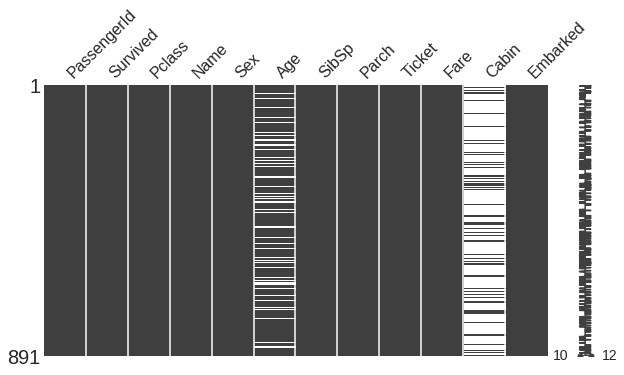

In [19]:
missingno.matrix(train, figsize = (10,5))

* 보시다시피 '나이'와 '캐빈' 번호에서 구멍이 많습니다.
* 빈칸의 숫자를 보겠습니다.

In [20]:
train.isnull().sum() #비어 있는 값들을 체크해 본다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* sum 말고 any를 쓰면 특정 행에 비어 있는 것이 True(=빈 것 있음) False(= 빈 것 없음)를 알 수 있습니다. 

In [21]:
train.Age.isnull().any()

True

* Age는 177개가 없고, Cabin 687개가 없습니다. 그리고 Embarked에도 2개의 빈 데이터가 있습니다.
* 머신러닝 툴은 빈칸을 아주 싫어 합니다.
* 나중에 이를 어떻게 할 것인지 좀 생각해 보겠습니다.

* 각 열의 데이터 타입을 보겠습니다.

In [22]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* 나중에 오브젝트로 된 것은 컴퓨터가 분석하기 좋게 숫자로 바꾸어 주어야 할 것입니다.

#### 항목의 종류

#### 범주형 항목 (Categorical Features)
범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. ** 이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable **라고도합니다.

** 데이터 셋에서 명목 항목 : Sex, Embark ** 이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다.

Ordinal Variable :
순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다. 예를 들어 값이 ** Tall, Medium, Short ** 인 ** Height **와 같은 피처가있는 경우 Height는 서수 변수입니다. 여기서 변수에 상대적인 정렬을 할 수 있습니다.

** 데이터 셋에서 순위 항목 : PClass ** 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.

#### 연속형 항목 (Continuous Features):
서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다. 

** 데이터 셋에서 순위 항목 : Age ** 이며, Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.


####항목 정보

https://www.kaggle.com/c/titanic/data
* 위의 링크에 가면 데이터 항목의 딕쇼너리를 보실 수 있습니다.

      Variable       Definition                Key

      survival	    Survival	             0 = No, 1 = Yes

      pclass	      Ticket class	         1 = 1st, 2 = 2nd, 3 = 3rd

      sex	          Sex	

      Age	          Age in years	

      sibsp	        # of siblings / spouses aboard the Titanic	

      parch	        # of parents / children aboard the Titanic	

      ticket	      Ticket number	

      fare	        Passenger fare	

      cabin	        Cabin number	

      embarked	    Port of Embarkation	     C = Cherbourg, Q = Queenstown, S = Southampton

* 이제 데이터 분석을 위해 새로운 데이터프레임 2개를 만들어 봅니다.

* 하나는 continous data 또 하나는 디스크릿 데이터로 분류 합니다.

* 나중에 둘 사이에 차이가 나오는지 보겠습니다. 

In [0]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

## Task 3 - "Surived" 분석

* 한 열씩 검토해 보겠습니다.

1. Survived -  ** Key: (0 - Not Survived, 1- Survived) **

* Survived는 수자로 값을 주지만 Categorical Variable인 셈입니다.
* 죽던지 살던지 둘 중 하나의 값을 줍니다.

* countplot을 그려 봅니다.
* 사이즈는 가로 10인치 세로 2인치
* 생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.

0    549
1    342
Name: Survived, dtype: int64


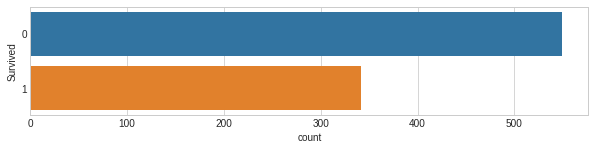

In [24]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

* 불행히도 사망자가 훨씬 많아 보입니다.
* 전체 사망자 비율을 좀 보겠습니다. 

* 파이그래프랑 카운트 플롯을 서브플롯으로 그립니다.
* 행은 하나 열은 2개의 서브 플롯입니다. 사이즈는 가로 15인치 세로 6인치
* 'Survived'의 값을 카운트해서 파이플롯을 만듭니다. 
* explode는 폭발하는 것이니까 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않습니다. 이어서 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
* autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미입니다. 뒤에 점 이하가 4면 둘 다 소수점 4자리수 까지 보여 줍니다.
* ax[0]은 첫번째 칸입니다.
* set_title 메소드는 서브 플롯의 제목을 보여 줍니다.   

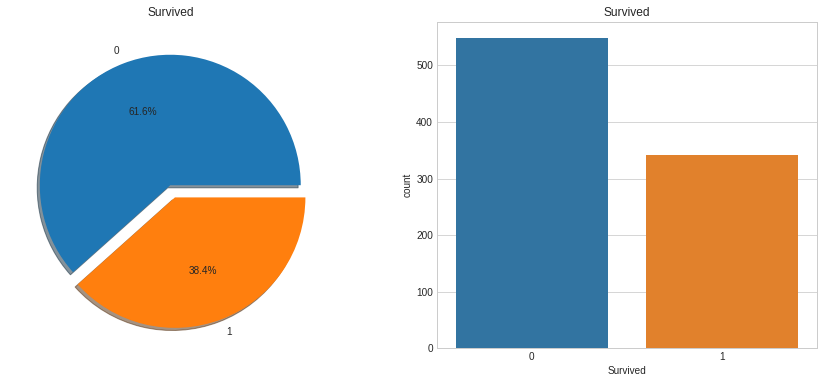

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 것을 아래와 같이 함수로 만들겠습니다. (물론 자주 쓰이지는 않겠지만 연습이니)

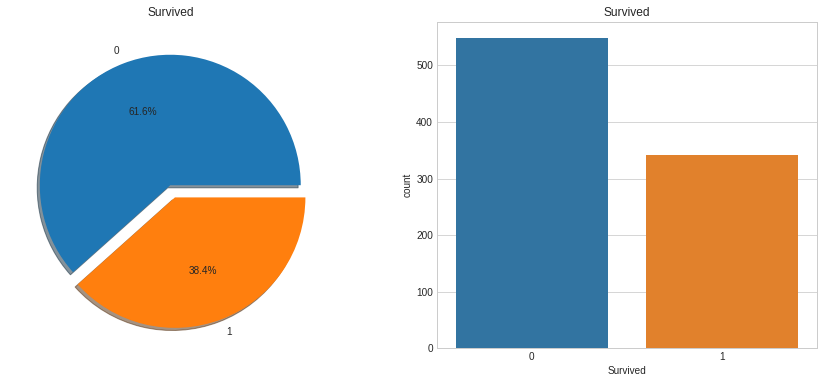

In [26]:
def piecount(a):
    f,ax=plt.subplots(1,2,figsize=(15,6))
    train[a].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(a)
    ax[0].set_ylabel('')
    sns.countplot(a,data=train,ax=ax[1])
    ax[1].set_title(a)
    plt.show()

piecount('Survived')

* 문제는 위의 함수가 달랑 두개의 값만 가진 것에 통한다는 사실입니다.
* 그럼 저 함수를 Pclass에 쓰면 3개 값이라 에러가 날 것입니다.
* 이 때는 위를 클래스를 만들고 파이썬 수업에서 배운 오버라이딩을 해줘야죠. 하지만 용도에 대비해서 너무 과도 한 일이라 3개 짜리를 다시 한 번 만들어 봅니다. 살짝만 바꾸어 봅니다. 

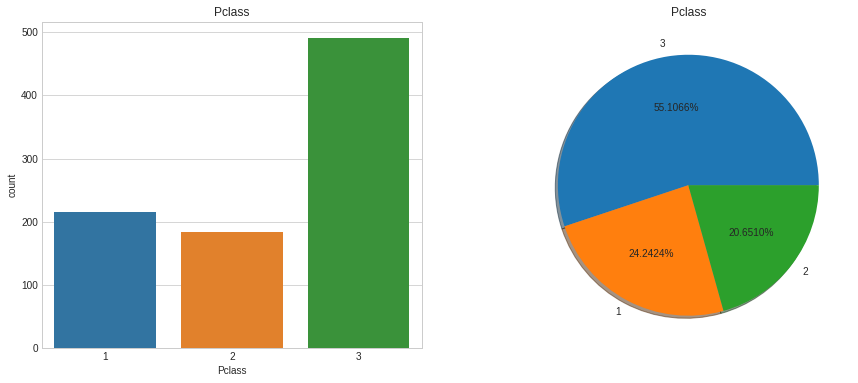

In [27]:
def piecount3(a):
      f,ax=plt.subplots(1,2,figsize=(15,6))
      train[a].value_counts().plot.pie(explode=[0,0.0,0],autopct='%0.4f%%',ax=ax[1],shadow=True)
      ax[1].set_title(a)
      ax[1].set_ylabel('')
      sns.countplot(a,data=train,ax=ax[0])
      ax[0].set_title(a)
      plt.show()

piecount3("Pclass")

* 이제 생존한 사람들의 데이터를 우리가 만든 새로운 데이터 프레임에 옮겨 놓습니다.

In [0]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

* 잘 들어 갔나 확인해 봅니다.

In [29]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [30]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


* 여기서 우리가 함수를 하나 만들어 쓰겠습니다. 앞으로도 위 두 파일을 계속 보게 될 것이 뻔하니 한 줄에 보도록 만들죠
* 둘로 나누어서 해보지요

In [94]:
def bin(a,b):
	df_bin[a] = train[b]
	return df_bin.head()

bin('Survived', 'Survived')

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [95]:
def con(a,b):
	df_con[a] = train[b]
	return df_con.head()

con('Survived', 'Survived')

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


* 이젠 bin(). con()만 아규먼트랑 같이 호출하면 됩니다. 이 것은 자주 쓰일 것 같습니다.

## Task 4 - "Pclass" 분석

* Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature이다. 

Key:1 = 1st, 2= 2nd, 3 = 3rd

* 각 클래스 당 생존자를 보겠습니다.

In [33]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [34]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


*1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.

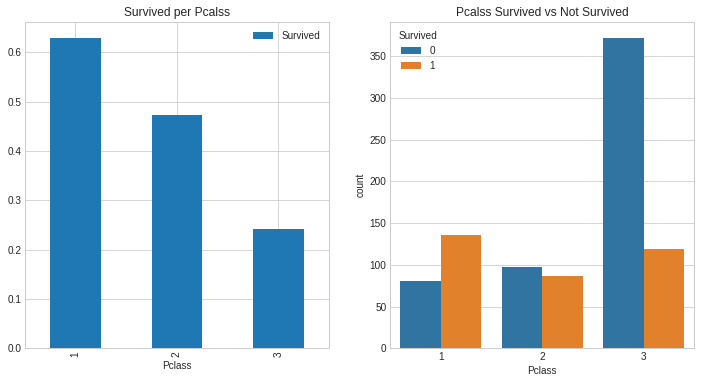

In [35]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

* 위에 만든 함수를 한 번 써 먹어 볼까요?

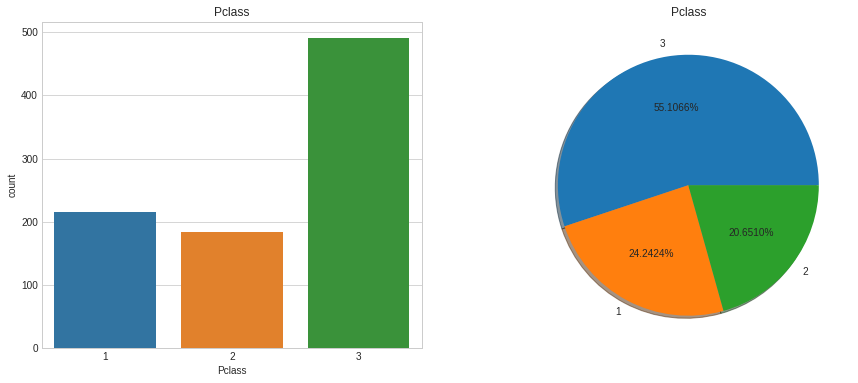

In [36]:
piecount3("Pclass")

* %는 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있습니다.
* 각 클래스 당 생존률을 볼까요?

In [37]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

*위에 것도 함수로 만들죠

In [38]:
def survpct(a):
  return train.groupby(a).Survived.mean()

survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

* 값을 옮깁니다.

In [39]:
bin('Pclass', 'Pclass')

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [40]:
con('Pclass', 'Pclass')

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Task 5 - "Name" 분석

* 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr. Capt, master and so on 모두 감안하면...
* 분류를 한 번 해 봅니다.
* 리스트를 한 번 주 욱 보겠습니다.

In [41]:
train.Name.value_counts()

Green, Mr. George Henry                        1
Isham, Miss. Ann Elizabeth                     1
Sundman, Mr. Johan Julian                      1
Devaney, Miss. Margaret Delia                  1
Ayoub, Miss. Banoura                           1
                                              ..
Peter, Miss. Anna                              1
Clarke, Mrs. Charles V (Ada Maria Winfield)    1
Lefebre, Miss. Jeannie                         1
Pettersson, Miss. Ellen Natalia                1
Meyer, Mrs. Edgar Joseph (Leila Saks)          1
Name: Name, Length: 891, dtype: int64

* 감이 안 옵니다. 중간에 있는 Mr. 호칭을 볼까요. 
* ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
* 아래에서 str.extract('([A-Za-z]+)\.')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 \. 명령을 통해 .으로 끝나는 부분을 추출해 내는 것입니다.  
* ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한캐릭터만 추출합니다. 



In [0]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


* 이를 성별로 봅니다.

In [44]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* 생존률로 봅니다.

In [45]:
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

* 생존 숫자로 봅니다.

In [46]:
pd.crosstab(train.Initial,train.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


####하나씩 봅니다.

* Capt: 대위이니 젊은 군인으로 희생을 자처했을 가능성이 크다. Young Soldier --> ys
* Col: 대령이니 중년 군인. Old Soldier --> os
* Countess: 여성 귀족 --> Female Noble --> fn
* Don: Donald의 약자 ?  -> mr
* Dr: 의사 선생님 --> dr
* Johnkheer: 남자 이름인듯 --> mr
* Lady: 여성 귀족 --> fn
* Major: 역시 영관급이니 --> os
* Master: 아이들 --> ma
* Miss: 젊은 여성 --> ms
* Mlle: 마드모아젤 이니 나이 많으신 여성 귀족일 가능성이 크다 - fn 
* Mme: 마담의 프랑스어 준말로 역시 나이 많으신 프랑스 여성 귀족일 가능성이 크다. - fn
* Mr: mr
* Mrs: mrs
* Ms: 요즘은 miss+mrs의 뜻이나 당시 영국에서는 한번 결혼한 여성을 ms라 불렀다. 굳이 따로 부른 것을 보면 귀족 widow가 아니었을까? - fn 
* Rev: 목사님이시니 스스로 희생했을 가능성이 크다. rv
* Sir: 남자 귀족 - mn

* 참고로 항목이 너무 많아도 문제지만 너무 병합하면 확률이 확 떨어진다.

* 이들을 위에 약자로 바꾼다.

In [0]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Master', 'Miss', 'Mr', 'Mrs'],['fn','fn','fn','dr','os','fn','fn','mr','os','rv','ys','mn','mr', 'ma', 'ms', 'mr','mrs' ],inplace=True)

In [51]:
pd.crosstab(train.Initial,train.Survived).T.style.background_gradient(cmap='summer_r')

Initial,dr,fn,ma,mn,mr,mrs,ms,os,rv,ys
Survived,,,,,,,,,,
0,4,0,17,0,438,26,55,2,6,1
1,3,6,23,1,81,99,127,2,0,0


In [53]:
survpct('Initial')

Initial
dr     0.428571
fn     1.000000
ma     0.575000
mn     1.000000
mr     0.156069
mrs    0.792000
ms     0.697802
os     0.500000
rv     0.000000
ys     0.000000
Name: Survived, dtype: float64

* 여기서 잠시 블공평한 세상을 경험하면....Initial을 Pclass별로 나누어 보자

In [54]:
pd.crosstab(train.Initial,train.Pclass).T.style.background_gradient(cmap='summer_r')

Initial,dr,fn,ma,mn,mr,mrs,ms,os,rv,ys
Pclass,,,,,,,,,,
1,5,5,3,1,109,42,46,4,0,1
2,2,1,9,0,91,41,34,0,6,0
3,0,0,28,0,319,42,102,0,0,0


* Pclass별 생존 별로 보자

In [57]:
pd.crosstab([train.Initial,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 이를 Class Name('CN')으로 바꾸어 새로운 열로 입력하자

In [0]:
train['CN']=0

def cn(k):
  for n in range(1,4):
    train.loc[(train['Initial'] == k) & (train['Pclass'] == n),'CN']= k+str(n)

cn('dr')
cn('ma')
cn('mr')
cn('ms')
cn('mrs')


def cn1(k):
   train.loc[(train['Initial'] == 'k'),'CN']= k

cn1('fn')
cn1('mn')
cn1('os')
cn1('rv')
cn1('ys')







In [85]:
pd.crosstab([train.CN,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 어?? CN에 없는 value가 있습니다. 봅니다.

In [86]:
train.CN.isnull().sum()

0

* null 이 아니라 0 이 군요. 위에 cn1이 작동 안 했을 가능성이 큽니다.

In [89]:
train.loc[(train['CN'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,CN
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,rv,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,rv,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,rv,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,fn,0
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,fn,0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,os,0
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,os,0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,fn,0
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,mn,0
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q,rv,0


* 다시 넣겠습니다.

In [0]:
train.loc[(train['CN'] == 0),'CN']= train['Initial']

* 다시 봅니다.

In [91]:
pd.crosstab([train.CN,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')


* 이 값을 새로운 데이터 프레임 이름칸에 넣습니다.

In [97]:
bin('Name','CN')

,Survived,Pclass,Name
0,0,3,mr3
1,1,1,mrs1
2,1,3,ms3
3,1,1,mrs1
4,0,3,mr3


In [98]:
con('Name','CN')

,Survived,Pclass,Name
0,0,3,mr3
1,1,1,mrs1
2,1,3,ms3
3,1,1,mrs1
4,0,3,mr3
